In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = np.array([[0, 0], [1, 0.3], [1, 0.7], [2, 1]])
y = np.array([-1, -1, 1, 1])

model = LogisticRegression()
model.fit(X, y)

w1, w2 = model.coef_[0]
b = model.intercept_[0]

w1, w2, b

(0.6006421511787834, 0.49054040895851175, -0.8460708054663837)

In [4]:
X = [(0, 0), (1, 0.3), (1, 0.7), (2, 1)]
b = 0.8
gamma = 0.9

on_margin_points = []
for i, (x1, x2) in enumerate(X):
    f_xi = b + w1 * x1 + w2 * x2
    print(abs(f_xi))
    if abs(f_xi) == gamma:
        on_margin_points.append((i + 1, f_xi))

on_margin_points

0.8
1.547804273866337
1.7440204374497417
2.4918247113160783


[]

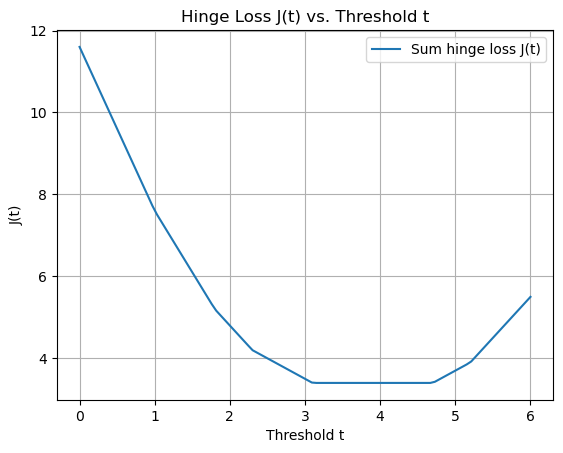

In [8]:
# 2. (a)
import matplotlib.pyplot as plt

x = np.array([0, 1.3, 2.1, 2.8, 4.2, 5.7])
y = np.array([-1, -1, -1, 1, -1, 1])

t = np.linspace(0, 6, 100)
J = []


def hinge_loss(t):
    z = x - t
    epsilon = np.maximum(0, 1 - y * z)
    return np.sum(epsilon)


for i in t:
    J_t = hinge_loss(i)
    J.append(J_t)

# Plot J(t) vs. t
plt.plot(t, J, label="Sum hinge loss J(t)")
plt.xlabel("Threshold t")
plt.ylabel("J(t)")
plt.title("Hinge Loss J(t) vs. Threshold t")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# 2. (b)
optimal_t = t[np.argmin(J)]
min_J = min(J)
print(f"value t {optimal_t} minimizes J(t) at {min_J}")

value t 3.1515151515151514 minimizes J(t) at 3.4000000000000004


In [26]:
# 2. (c)

def hinge_loss2(t):
    z = x - t
    epsilon = np.maximum(0, 1 - y * z)
    return epsilon


slack_variables = hinge_loss2(optimal_t)
print(slack_variables)


[0.         0.         0.         1.35151515 2.04848485 0.        ]


In [28]:
# 2. (d)

margin_violators = [i for i, epsilon in enumerate(slack_variables) if epsilon > 0]
misclassified_samples = [i for i, epsilon in enumerate(slack_variables) if epsilon > 1]
print(f"margin_violators: {margin_violators}")
print(f"misclassified_samples: {misclassified_samples}")


margin_violators: [3, 4]
misclassified_samples: [3, 4]


In [35]:
Xmat = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [1, 2, 3, 4], [1, 2, 3, 4]])
x = Xmat.ravel()
x

array([1, 2, 3, 4, 4, 5, 6, 7, 1, 2, 3, 4, 1, 2, 3, 4])

In [36]:
Xmat = x.reshape(4, 4)
Xmat

array([[1, 2, 3, 4],
       [4, 5, 6, 7],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

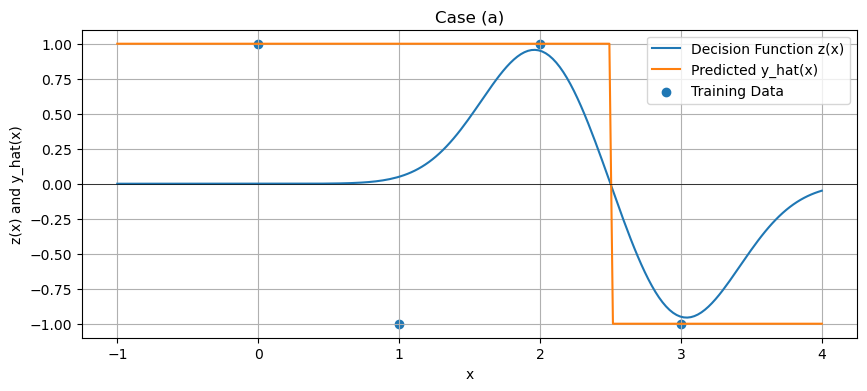

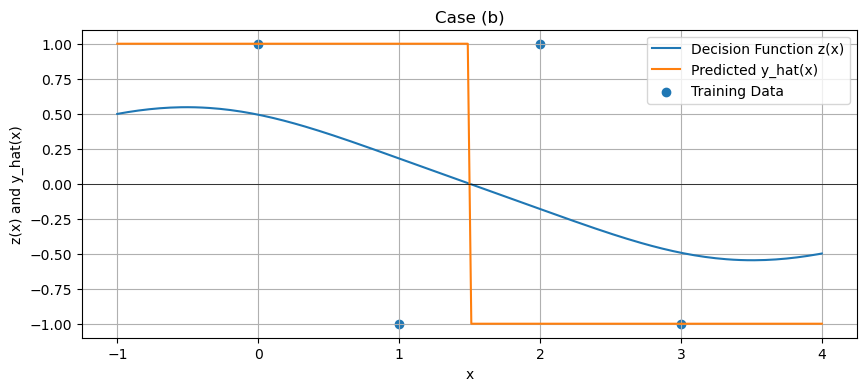

In [42]:
# 4
xtr = np.array([0, 1, 2, 3])
ytr = np.array([1, -1, 1, -1])

a = np.array([0,0,1,1])
r = 3

def rbf(x, x_prime, r):
    return np.exp(-r * (x - x_prime) ** 2)

    
def get_z(x, r, a):

    z = np.sum([a[i] * ytr[i] * rbf(xtr[i], x, r) for i in range(len(a))])
    return z
def get_y_hat(z):
    if z > 0:
        return 1
    elif z < 0:
        return -1
def plot(r, a, title):
    x_values = np.linspace(-1,4,200)
    z_values = [get_z(x, r, a) for x in x_values]
    y_hat = [get_y_hat(z) for z in z_values]
    
    plt.figure(figsize=(10, 4))
    plt.plot(x_values, z_values, label="Decision Function z(x)")
    plt.plot(x_values, y_hat, label="Predicted y_hat(x)")
    plt.scatter(xtr, ytr, label="Training Data")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.xlabel("x")
    plt.ylabel("z(x) and y_hat(x)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# case a
gamma_a = 3
alpha_a = [0, 0, 1, 1]
plot(gamma_a, alpha_a, "Case (a)")

# case b
gamma_b = 0.3
alpha_b = [1, 1, 1, 1]
plot(gamma_b, alpha_b, "Case (b)")